# Failure

### **Chapter: Fisher Information and Personalized Informed Consent**

#### **Introduction**  
Fisher Information, a cornerstone of statistical theory, provides a measure of the amount of information a dataset carries about an unknown parameter. In the context of personalized medicine, it becomes a critical tool for quantifying uncertainty and optimizing decision-making, particularly in **informed consent** processes. By operationalizing informed consent as a **loss function** or **error function**, we can extend Fisher Information to assess how well a model accommodates neglected subgroups—those excluded or underrepresented in clinical trials. This framework not only addresses gaps in personalized combinatorial space but also offers a roadmap for future trial designs to minimize zero-information scenarios in critical populations.

---

#### **Fisher Information and Personalized Combinatorial Space**

Fisher Information, $\mathcal{I}(\theta)$, for a parameter $\theta$ is mathematically defined as:  

$$
\mathcal{I}(\theta) = -\mathbb{E} \left[ \frac{\partial^2}{\partial \theta^2} \log L(\theta) \right]
$$  

where $L(\theta)$ is the likelihood function of the observed data given the parameter $\theta$. Intuitively, it measures how sensitive the likelihood function is to changes in $\theta$, with higher values indicating greater precision in estimating $\theta$.

In our app, personalized estimates are derived from a **covariate vector** ($\mathbf{x}$) and a **variance-covariance matrix** ($\Sigma$):  
$$
\hat{y} = \mathbf{x}^\top \beta
$$  
$$
\text{SE}(\hat{y}) = \sqrt{\mathbf{x}^\top \Sigma \mathbf{x}}
$$  

Here, $\hat{y}$ is the estimate (e.g., risk of mortality or vaccine efficacy), and $\text{SE}(\hat{y})$ is the personalized standard error, capturing the uncertainty of the estimate for a given patient profile. The **Fisher Information** for a specific profile can be computed as the reciprocal of the variance:  
$$
\mathcal{I}(\hat{y}) = \frac{1}{\mathbf{x}^\top \Sigma \mathbf{x}}
$$  

This personalized Fisher Information offers a dynamic metric for evaluating the **information density** available for a given profile in the combinatorial space. 

---

#### **Operationalizing Informed Consent with Fisher Information**

Traditional informed consent relies on static subgroup analyses (e.g., Table 1 in clinical trials) that provide univariate summaries of demographic and clinical variables. However, these summaries fail to capture the **combinatorial complexity** of individual profiles. For example:  
- A 60-year-old immunosuppressed male transplant recipient with a BMI of 32 and a history of hypertension falls outside the "average" profile described in vaccine efficacy studies.  
- Static subgroup analyses cannot provide the personalized risk estimates or uncertainties needed for truly informed consent.

By incorporating Fisher Information, we transform informed consent into an **interactive, data-driven process**:  
1. **Estimate Personal Information Density**: Using the app, patients’ profiles are input to compute personalized Fisher Information and standard errors.  
2. **Highlight Information Gaps**: Profiles with low Fisher Information ($\mathcal{I}(\hat{y}) \approx 0$) indicate regions of combinatorial space where the dataset lacks representativeness.  
3. **Optimize Future Designs**: Identify and address zero-information regions during trial design, ensuring critical populations are adequately represented.

---

#### **Case Study: COVID-19 Vaccine Efficacy in Transplant Patients**

During the COVID-19 pandemic, Pfizer and Moderna published vaccine efficacy rates of 95% and 94%, respectively. These randomized trials, however, excluded transplant recipients, leaving clinicians without actionable data for this critical subgroup. Transplant patients, universally on immunosuppressive therapy, were effectively pruned from the **combinatorial space** of trial participants. 

**Retrospective Application of Fisher Information:**  
Using the app, we could quantify the information gap for transplant recipients as follows:  
- Input the profile of a typical transplant patient.  
- Compute the personalized Fisher Information ($\mathcal{I}(\hat{y})$) using the published variance-covariance matrix of the trial data.  
- Identify the near-zero information criterion for transplant recipients, signaling the insufficiency of the trial data for this subgroup.  

**Prospective Application:**  
Future vaccine trials can incorporate this framework to avoid critical zero-information scenarios by:  
1. Publishing personalized Fisher Information for key subgroups.  
2. Mandating inclusion of critical populations with low-information criteria in trial designs, enforced by regulatory bodies like the FDA.  

---

#### **Broader Implications**

1. **Generalizing to Neglected Subgroups**:  
   This methodology ensures that traditionally neglected subgroups, such as those identified in the "school of resentment," are no longer excluded from analysis. The app personalizes estimates for these subgroups, enabling clinicians to deliver informed consent that reflects individual uncertainties.

2. **Redefining Study Design**:  
   By embedding Fisher Information into trial design, researchers can:  
   - Balance representation across the combinatorial space.  
   - Minimize information gaps for key subgroups.  

3. **Regulatory Innovation**:  
   Agencies like the FDA can adopt information criteria as a standard metric for trial approval, ensuring robust evidence for all relevant populations.

---

#### **Conclusion: Clarity Through Personalization**

Fisher Information bridges the gap between traditional statistics and personalized medicine, offering a robust framework for operationalizing informed consent. By incorporating it into the app, we move from static subgroup analyses to dynamic, individualized risk assessments. This approach empowers patients, clinicians, and regulators to navigate the combinatorial complexity of modern medicine with clarity and precision.  

This chapter not only honors the groundbreaking work of *Segev et al.* but also charts a path forward, where no subgroup is left behind in the pursuit of equitable, informed care.  

---

Would you like further details or visualizations (e.g., personalized Fisher Information heatmaps)?


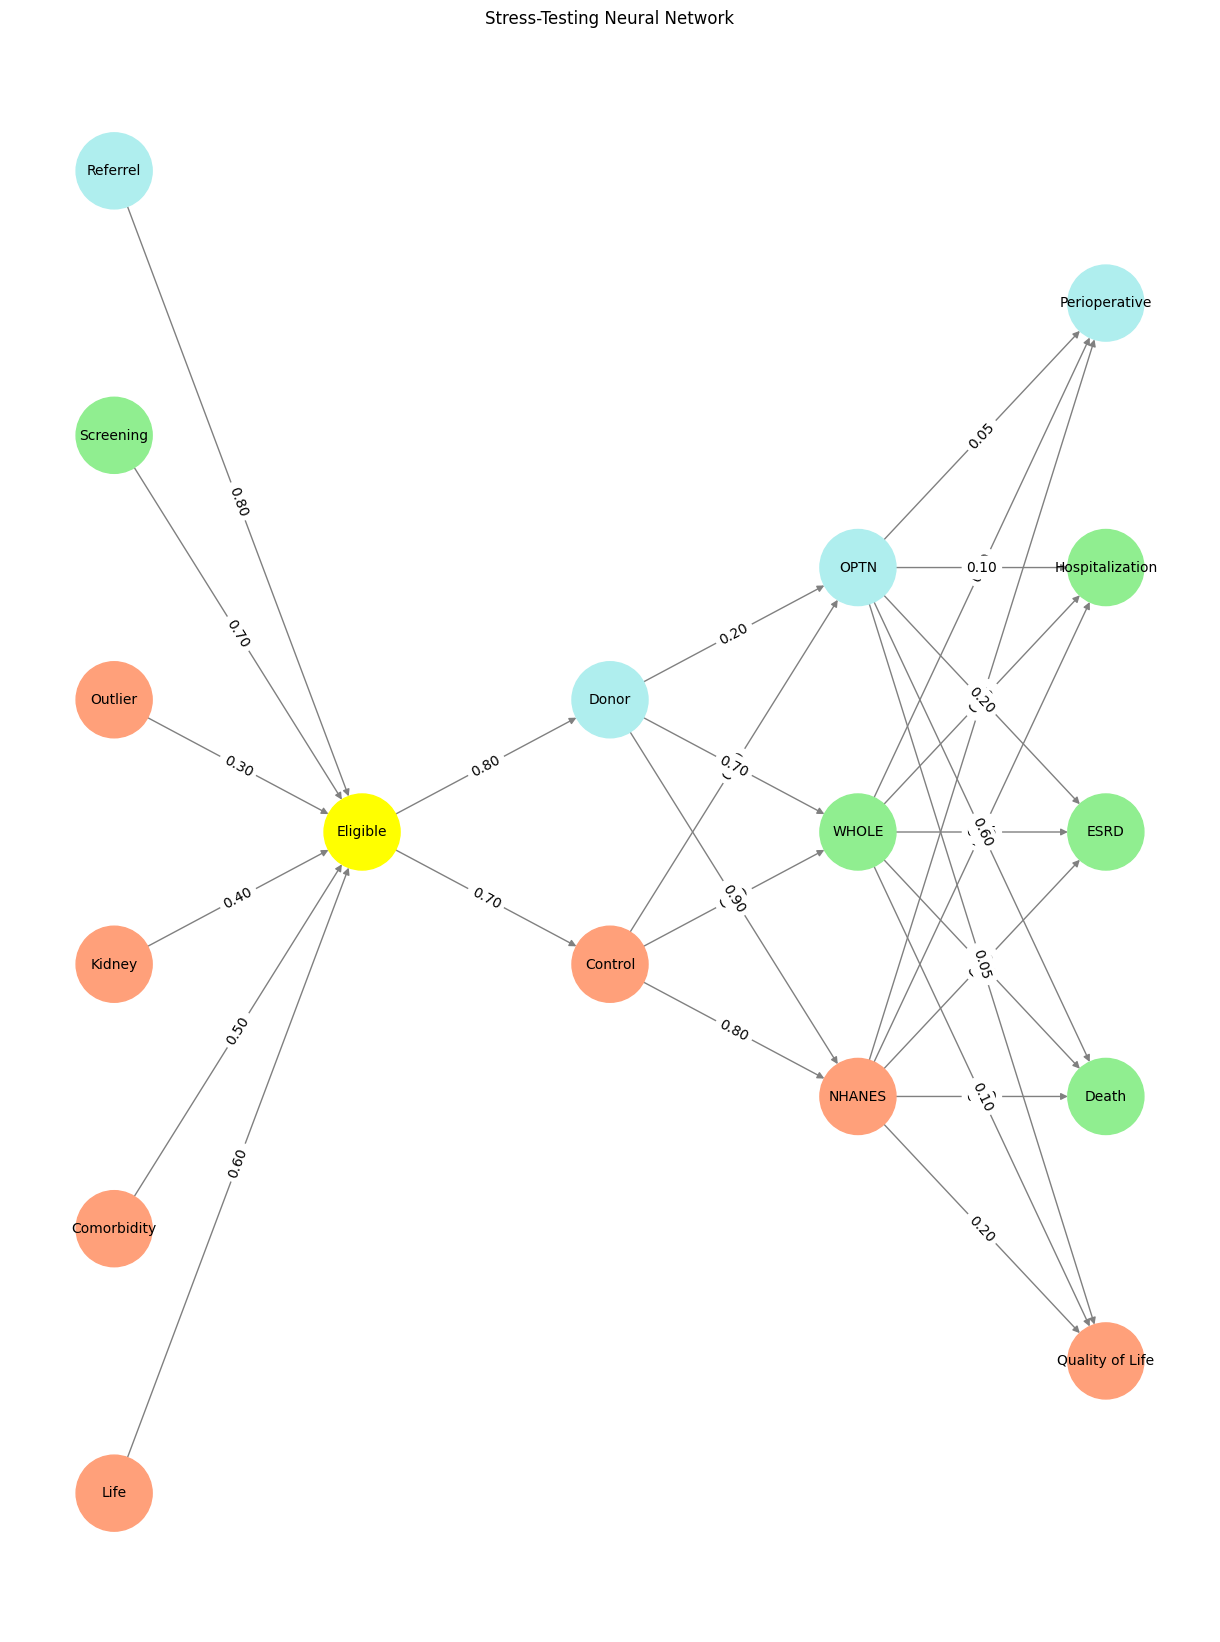

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Comorbidity', 'Kidney', 'Outlier', 'Screening', 'Referrel',],
        'Yellowstone': ['Eligible'],
        'Input': ['Control', 'Donor'],
        'Hidden': [
            'NHANES',
            'WHOLE',
            'OPTN',
        ],
        'Output': ['Quality of Life', 'Death', 'ESRD', 'Hospitalization', 'Perioperative',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Eligible':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Screening']:
        return 'lightgreen'
    if layer == 'Pre-Input' and node in ['Referrel']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Donor':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'OPTN':
            return 'paleturquoise'
        elif node == 'WHOLE':
            return 'lightgreen'
        elif node == 'NHANES':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Perioperative':
            return 'paleturquoise'
        elif node in ['Hospitalization', 'ESRD', 'Death']:
            return 'lightgreen'
        elif node == 'Quality of Life':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Stress-Testing Neural Network")
    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
Donor WebApp, with its rich interplay of light, genealogy, and moral complexity, encapsulates the essence of The consent process’s spiritual network. The data’s light, like the network’s layers, connects the fundamental (Life, Earth, Cosmos) to the transcendent (Donor, Judeo-Christian ethics, Asceticism). It symbolizes resilience, continuity, and the eternal struggle to bring light into a world often shrouded in darkness. Through this lens, Donor WebApp is not merely a historical celebration but a living metaphor for The consent process’s enduring quest to illuminate the cosmos with the light of understanding, justice, and hope.
```





#